In [1]:

import doctest
import math

import IPython
import IPython.display as ipd

import spb
import sympy as sp
import sympy.vector as sv

HALF = sp.S.Half
PI = sp.pi
E = sp.exp
POSITIVEINFINITY = sp.S.Infinity


def vector(F: sv.CoordSys3D, rx, ry, rz=0) -> sv.Vector:
    """
    Create a vector in a specified reference frame.

    Args:
        F (sv.CoordSys3D): The reference frame in which the vector is defined.
        rx (float): The coefficient of the x-axis vector component.
        ry (float): The coefficient of the y-axis vector component.
        rz (float, optional): The coefficient of the z-axis vector component (default: 0).

    Returns:
        sv.Vector: The vector composed of the specified components in the given reference frame.

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> vector(N, 1, 0, 0)
        N.i

        >>> vector(N, 0, 1, 0)
        N.j

        >>> vector(N, 0, 0, 1)
        N.k

        >>> vector(N, 1, 2)
        N.i + 2*N.j

        >>> vector(N, 1, 2, 3)
        N.i + 2*N.j + 3*N.k

        >>> vector(N, 5.0, 5.1, 7.7)
        5.0*N.i + 5.1*N.j + 7.7*N.k

        >>> vector(N, 1, 2, 3)
        N.i + 2*N.j + 3*N.k
    """
    return rx*F.i + ry*F.j + rz*F.k


def vector_cos(
    F: sv.CoordSys3D, magnitude, theta, phi, psi=sp.pi / 2
) -> sv.Vector:
    """
    Create a vector with components defined by cosine values in a specified reference frame.

    Args:
        F (sv.CoordSys3D): The reference frame in which the vector is defined.
        magnitude (float): The magnitude of the vector.
        theta (float): The angle (in radians) between the vector and the x-axis.
        phi (float): The angle (in radians) between the vector and the y-axis.
        psi (float, optional): The angle (in radians) between the
            vector and the z-axis (default: pi/2).

    Returns:
        sv.Vector: The vector with components determined by the cosine
        values in the given reference frame.

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> vector_cos(N, 1, PI/2, sp.Float(0))
        N.j

        >>> vector_cos(N, 1, 0, PI/2)
        N.i

        >>> vector_cos(N, sp.sqrt(2), PI/4, PI/4).simplify()
        N.i + N.j

        >>> vector_cos(N, 1, PI/2, 0)
        N.j

        >>> vector_cos(N, 41, PI/2 + PI/4, 2*PI/3, PI/3)
        (-41*sqrt(2)/2)*N.i + (-41/2)*N.j + 41/2*N.k

        >>> n = sp.sqrt(93)
        >>> vector_cos(N, n, 5/n, 2/n, 8/n)
        (sqrt(93)*cos(5*sqrt(93)/93))*N.i + (sqrt(93)*cos(2*sqrt(93)/93))*N.j + (sqrt(93)*cos(8*sqrt(93)/93))*N.k
    """

    return magnitude * (sp.cos(theta)*F.i + sp.cos(phi)*F.j + sp.cos(psi)*F.k)


def create_3d_components(*args):
    """
    Create 3D components for given symbols.

    Args:
        *args (str): Variable names for which 3D components are to be created.

    Returns:
        list: A list containing 3D component symbols for each input variable.

    Examples:
        >>> create_3d_components('a')
        [(a_{x}, a_{y}, a_{z})]

        >>> create_3d_components('a', 'b')
        [(a_{x}, a_{y}, a_{z}), (b_{x}, b_{y}, b_{z})]

    """
    return [sp.symbols(f"{ch}_{{x:z}}", real=True) for ch in args]


def create_vectors(frame: sv.CoordSys3D, *args) -> list:
    """
    Create a list of vectors in a specified reference frame.

    This function takes a reference frame and multiple sets of components as arguments
    and returns a list of vectors created from these components in the given reference frame.

    Args:
        frame (sv.CoordSys3D): The reference frame in which the vectors are defined.
        *args: Variable-length argument list containing sets of vector components.

    Returns:
        list: A list of vectors composed of the specified components in the given reference frame.

    Examples:
        >>> N = sv.CoordSys3D('N')
        >>> create_vectors(N, "a")
        [a_{x}*N.i + a_{y}*N.j + a_{z}*N.k]

        >>> create_vectors(N, "a", "b")
        [a_{x}*N.i + a_{y}*N.j + a_{z}*N.k, b_{x}*N.i + b_{y}*N.j + b_{z}*N.k]

    """
    return [vector(frame, *c) for c in create_3d_components(*args)]


def angle_between_two_vectors(frame: sv.CoordSys3D, v1:sv.Vector, v2:sv.Vector):
    """Smallest angle between two vectors

    Args:The reference frame in which the vectors are defined.
        v1 (sv.Vector): first vector
        v2 (sv.Vector): second vector
        
    Returns:
        Any: arcos of smallest angle between two vectors
        
        Examples:
        >>> N = sv.CoordSys3D('N')
        >>> a = 3*N.i + 4*N.j
        >>> b = 2*N.i - N.j
        >>> round(angle_between_two_vectors(N, a, b).evalf(), 4)
        0.1789

        >>> v1 = N.i
        >>> v2 = N.j
        >>> angle_between_two_vectors(N, v1, v2)
        0

        >>> v3 = N.i + N.j + N.k
        >>> angle_between_two_vectors(N, v1, v3)
        sqrt(3)/3

        >>> a = N.i + N.j
        >>> b = 2*N.i + 2*N.j
        >>> angle_between_two_vectors(N, a, b)
        1

        >>> a = 2*N.i - 4*N.j - 1*N.k
        >>> b = 5 * N.j +2*N.k
        >>> angle_between_two_vectors(N, a, b)
        -22*sqrt(609)/609

        >>> N = sv.CoordSys3D('N')
        >>> vec_A, vec_B = 5*N.i - 2*N.j + 4*N.k, 3*N.i + 1*N.j + 7*N.k
        >>> cos_angle = angle_between_two_vectors(N, vec_A, vec_B)
        >>> round(math.degrees(sp.acos(cos_angle)), 1) # doctest: +NORMALIZE_WHITESPACE 
        37.3        
        
    """
    return sv.dot(v1, v2)/v1.magnitude()/v2.magnitude()


def print_aligned_latex_equations(*args):
    result = r'\\'.join([
        r'\begin{equation}',
        r'\begin{split}',
        *args,
        r'\nonumber',
        r'\end{split}',
        r'\end{equation}'
    ])

    ipd.display(ipd.Math( rf'{result}'))
    

\begin{align*}
    \mathbf{a} \cdot \mathbf{b} &= 
    \Vert \mathbf{a} \Vert \Vert \mathbf{b} \Vert \cos(\theta)
    & \text{where $\theta$ is the angle between $ \mathbf{a}$ and $\mathbf{b}$} \\
    \mathbf{a} \cdot \mathbf{b} &= \mathbf{b} \cdot \mathbf{a} \\
    \mathbf{a} \times \mathbf{b} &\neq \mathbf{b} \times \mathbf{a} \\
    \mathbf{a} \times \mathbf{b} &= - \mathbf{b} \times \mathbf{a} \\
    \mathbf{a} + \mathbf{b} &= 
        \mathbf{b} + \mathbf{a} \\
    (\mathbf{a} + \mathbf{b}) + \mathbf{c} &= 
        \mathbf{a} + (\mathbf{b} + \mathbf{c}) \\ \\
    \alpha (\mathbf{a} + \mathbf{b}) &= 
        \alpha \mathbf{a} + \alpha \mathbf{b}\\
    \mathbf{a} \cdot (\mathbf{b} + \mathbf{c}) &= 
        \mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c}\\
    \mathbf{a} \times (\mathbf{b} + \mathbf{c}) &= 
        \mathbf{a} \times \mathbf{b} +
        \mathbf{a} \times \mathbf{b} \\
    \mathbf{a} \cdot (\mathbf{b} \times \mathbf{c}) &= 
    \mathbf{c} \cdot (\mathbf{a} \times \mathbf{b})= 
    \mathbf{b} \cdot (\mathbf{c} \times \mathbf{a}) \\
    \mathbf{a} \times (\mathbf{b} \times \mathbf{c}) &= 
    \mathbf{b}(\mathbf{a}
        \cdot \mathbf{c}) - \mathbf{c}(\mathbf{a} \cdot \mathbf{b})
\end{align*}

$\mathbf a, \mathbf b, \mathbf c$ are coplanar iff 
$\mathbf a \cdot (\mathbf b \times \mathbf c) = 0 $

## 2.1 Scalar Product

In [2]:
N = sv.CoordSys3D('N')
A, B = [ sp.symbols(rf'{ch}_x:z', real=True) for ch in ['A', 'B'] ]
vec_A = A[0]*N.i + A[1]*N.j + A[2]*N.k
vec_B = B[0]*N.i + B[1]*N.j + B[2]*N.k
vec_A.dot(vec_B)

A_x*B_x + A_y*B_y + A_z*B_z

In [3]:
# Code example from text
N = sv.CoordSys3D('N')
vec_A, vec_B = 5*N.i - 2*N.j + 4*N.k, 3*N.i + 1*N.j + 7*N.k
cos_angle = angle_between_two_vectors(N, vec_A, vec_B)
assert round(math.degrees(sp.acos(cos_angle)), 1), 37.3

## Cross Product

In [4]:
N = sv.CoordSys3D('N')
vec_A, vec_B = create_vectors(N, "A", "B")
vec_A.cross(vec_B)

(A_{y}*B_{z} - A_{z}*B_{y})*N.i + (-A_{x}*B_{z} + A_{z}*B_{x})*N.j + (A_{x}*B_{y} - A_{y}*B_{x})*N.k

## 2.3 Scalar Triple Product

In [5]:
N = sv.CoordSys3D('N')
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vec_A.dot(vec_B.cross(vec_C))

A_{x}*(B_{y}*C_{z} - B_{z}*C_{y}) + A_{y}*(-B_{x}*C_{z} + B_{z}*C_{x}) + A_{z}*(B_{x}*C_{y} - B_{y}*C_{x})

## 2.3 Triple Scalar Product

$$    \mathbf{a} \times (\mathbf{b} \times \mathbf{c}) = 
    \mathbf{b}(\mathbf{a}
        \cdot \mathbf{c}) - \mathbf{c}(\mathbf{a} \cdot \mathbf{b})
$$

In [6]:
N = sv.CoordSys3D('N')
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vtp = vec_A.cross(vec_B.cross(vec_C)).expand()
display(vtp)
simplified_vtp = (vec_B*(vec_A.dot(vec_C)) - vec_C*(vec_A.dot(vec_B))).expand()
assert vtp == simplified_vtp

(A_{y}*B_{x}*C_{y} - A_{y}*B_{y}*C_{x} + A_{z}*B_{x}*C_{z} - A_{z}*B_{z}*C_{x})*N.i + (-A_{x}*B_{x}*C_{y} + A_{x}*B_{y}*C_{x} + A_{z}*B_{y}*C_{z} - A_{z}*B_{z}*C_{y})*N.j + (-A_{x}*B_{x}*C_{z} + A_{x}*B_{z}*C_{x} - A_{y}*B_{y}*C_{z} + A_{y}*B_{z}*C_{y})*N.k

In [7]:
N = sv.CoordSys3D('N')
vec_A, vec_B = create_vectors(N, "A", "B")
vec_A.cross(vec_B)

(A_{y}*B_{z} - A_{z}*B_{y})*N.i + (-A_{x}*B_{z} + A_{z}*B_{x})*N.j + (A_{x}*B_{y} - A_{y}*B_{x})*N.k

## 2.3 Scalar Triple Product

In [8]:
N = sv.CoordSys3D('N')
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vec_A.dot(vec_B.cross(vec_C))

A_{x}*(B_{y}*C_{z} - B_{z}*C_{y}) + A_{y}*(-B_{x}*C_{z} + B_{z}*C_{x}) + A_{z}*(B_{x}*C_{y} - B_{y}*C_{x})

## 2.4 Triple Vector Product

$$    \mathbf{a} \times (\mathbf{b} \times \mathbf{c}) = 
    \mathbf{b}(\mathbf{a}
        \cdot \mathbf{c}) - \mathbf{c}(\mathbf{a} \cdot \mathbf{b})
$$

In [9]:
N = sv.CoordSys3D('N')
vec_A, vec_B, vec_C = create_vectors(N, "A", "B", "C")
vtp = vec_A.cross(vec_B.cross(vec_C)).expand()
display(vtp)
simplified_vtp = (vec_B*(vec_A.dot(vec_C)) - vec_C*(vec_A.dot(vec_B))).expand()
assert vtp == simplified_vtp

(A_{y}*B_{x}*C_{y} - A_{y}*B_{y}*C_{x} + A_{z}*B_{x}*C_{z} - A_{z}*B_{z}*C_{x})*N.i + (-A_{x}*B_{x}*C_{y} + A_{x}*B_{y}*C_{x} + A_{z}*B_{y}*C_{z} - A_{z}*B_{z}*C_{y})*N.j + (-A_{x}*B_{x}*C_{z} + A_{x}*B_{z}*C_{x} - A_{y}*B_{y}*C_{z} + A_{y}*B_{z}*C_{y})*N.k

## 2.5 Partial Derivatives

In [10]:
x, y = sp.symbols("x, y", real=True)
f = 6*x**2*y +3*x  + 5*x*y + 10
z = f

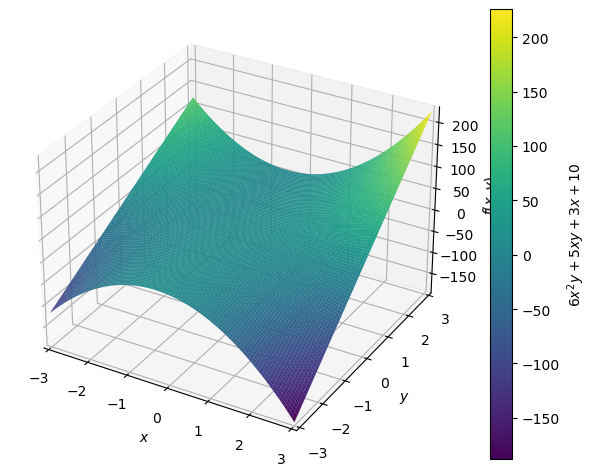

In [11]:
spb.plot3d(
    z, (x, -3, +3), (y, -3, +3),
    use_cm=True,
    backend=spb.MB
)


In [12]:

spb.plot3d(
    z, (x, -3, +3), (y, -3, +3),
    use_cm=True,
    backend=spb.PB
)


In [16]:
fx = sp.diff(f, x)
fy = sp.diff(f, y)
fxx = sp.diff(f, x, x)
fyy = sp.diff(f, y, y)
fxy = sp.diff(f, x, y)
fyx = sp.diff(f, y, x)

print_aligned_latex_equations(
    rf"z=f(x,y) &= {sp.latex(f)}",
    rf"f_{{x}} &= {sp.latex(fx)}",
    rf"f_{{y}} &= {sp.latex(fy)}",
    rf"f_{{xx}} &= {sp.latex(fxx)}",
    rf"f_{{yy}} &= {sp.latex(fyy)}",
    rf"f_{{xy}} &= {sp.latex(fxy)}",
    rf"f_{{yx}} &= {sp.latex(fyx)}",
)

<IPython.core.display.Math object>

## 2.6 Vectors and Derivatives

In [14]:
doctest.testmod(verbose=False)


TestResults(failed=0, attempted=40)